In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 1000)
# col 생략 없이 출력
pd.set_option('display.max_columns', 1000)

In [3]:
data_file = "./KOBIS_개봉일람_2023-03-20.csv"
df = pd.read_csv(data_file, encoding='UTF-8',index_col = "순번")

df.head()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,
1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682",사극,15세이상관람가,일반영화
2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944",코미디,15세이상관람가,일반영화
3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,"1,912","115,698,654,137","14,410,754",판타지,12세이상관람가,일반영화
4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2014-12-17,개봉영화,장편,한국,966,"110,828,014,630","14,245,998",드라마,12세이상관람가,일반영화
5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592",액션,12세이상관람가,일반영화


In [4]:
df.isnull()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
19540,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
19541,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19543 entries, 1 to 19543
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     19543 non-null  object
 1   감독      18261 non-null  object
 2   제작사     7168 non-null   object
 3   수입사     11565 non-null  object
 4   배급사     19499 non-null  object
 5   개봉일     19542 non-null  object
 6   영화유형    19543 non-null  object
 7   영화형태    19542 non-null  object
 8   국적      19543 non-null  object
 9   전국스크린수  19543 non-null  object
 10  전국 매출액  19522 non-null  object
 11  전국 관객수  19543 non-null  object
 12  장르      19472 non-null  object
 13  등급      19538 non-null  object
 14  영화구분    19543 non-null  object
dtypes: object(15)
memory usage: 2.4+ MB


In [6]:
df.isnull().sum()

영화명           0
감독         1282
제작사       12375
수입사        7978
배급사          44
개봉일           1
영화유형          0
영화형태          1
국적            0
전국스크린수        0
전국 매출액       21
전국 관객수        0
장르           71
등급            5
영화구분          0
dtype: int64

In [7]:
df = df.drop(['제작사', '수입사'], axis=1)
df['감독'].fillna('기타', inplace=True)
df['장르'].fillna('기타', inplace=True)
df['배급사'].fillna('기타', inplace=True)
df['영화형태'].fillna('기타', inplace=True)

In [8]:
df.isnull().sum()

영화명        0
감독         0
배급사        0
개봉일        1
영화유형       0
영화형태       0
국적         0
전국스크린수     0
전국 매출액    21
전국 관객수     0
장르         0
등급         5
영화구분       0
dtype: int64

In [9]:
for i in df['개봉일'][df['개봉일'].isnull()].index:
    df = df.drop(i)

for i in df['전국 매출액'][df['전국 매출액'].isnull()].index:
    df = df.drop(i)

for i in df['등급'][df['등급'].isnull()].index:
    df = df.drop(i)
    

In [10]:
df.isnull().sum()

영화명       0
감독        0
배급사       0
개봉일       0
영화유형      0
영화형태      0
국적        0
전국스크린수    0
전국 매출액    0
전국 관객수    0
장르        0
등급        0
영화구분      0
dtype: int64

In [11]:
df['전국 매출액'][df['전국 매출액'].isnull()]

Series([], Name: 전국 매출액, dtype: object)

In [12]:
df['영화명'][503]

KeyError: 503

In [13]:
category_cols = ['영화명','감독', '배급사', '영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(df[col].unique())))

컬럼 [영화명] UNIQUE : 19161
컬럼 [감독] UNIQUE : 7791
컬럼 [배급사] UNIQUE : 1327
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 72
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 17
컬럼 [영화구분] UNIQUE : 2


In [14]:
len(df['감독'].unique()), df['감독'].unique()

(7791,
 array(['김한민', '이병헌', '김용화', ..., '오카다 히로', '허재형', '레 탄 선'], dtype=object))

In [15]:
# 다수의 감독 데이터 변경
for idx, row in df.iterrows():
    if ',' in row['감독']:
        directors = row['감독'].split(',')
        # 양 끝 공백 제거 후 정렬
        directors.sort(key=lambda x : x.strip())
        df['감독'][idx] = directors[0].strip()

In [ ]:
len(df['감독'].unique()), df['감독'].unique()

In [16]:
df['배급사'].unique()

array(['(주)씨제이이엔엠', '롯데쇼핑㈜롯데엔터테인먼트', '월트디즈니컴퍼니코리아 유한책임회사', ..., '하드릴',
       '주식회사 게티스버그컴퍼니', '쇼이스트(주),(주)씨제이이엔엠'], dtype=object)

In [17]:
for idx, row in df.iterrows():
    if ',' in row['배급사']:
        distributor = row['배급사'].split(',')
        # 양 끝 공백 제거 후 변경
        df['배급사'][idx] = distributor[0].strip()

In [ ]:
print(len(df['배급사'].unique()))

In [18]:
df['배급사'].unique()

array(['(주)씨제이이엔엠', '롯데쇼핑㈜롯데엔터테인먼트', '월트디즈니컴퍼니코리아 유한책임회사', '주식회사 해리슨앤컴퍼니',
       '(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '주식회사 에이비오엔터테인먼트', '(주)시네마서비스',
       '롯데컬처웍스(주)롯데엔터테인먼트', '(주)다자인소프트', 'CJ ENM',
       '소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)', '워너브러더스 코리아(주)',
       '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점', '이십세기폭스코리아(주)', '플러스엠 엔터테인먼트',
       '(주)디스테이션', '유니버설픽쳐스인터내셔널 코리아(유)', 'UIP코리아', '한국소니픽쳐스릴리징브에나비스타영화㈜',
       '월트디즈니컴퍼니코리아(주)', 'CGV아트하우스', '브에나비스타인터내셔널코리아', '(주)싸이더스',
       '판씨네마(주)', '(주)와우픽쳐스', '이십세기폭스필름코퍼레이션', '(주)에이스메이커무비웍스',
       '소니픽쳐스릴리징코리아', '(주)스튜디오디에이치엘', '코리아픽쳐스(주)', '(주)프라임엔터테인먼트',
       '아이러브시네마', '(주)이수C&E', '(주)인벤트스톤', '㈜인디스토리', '필라멘트픽쳐스',
       '(주)엠케이픽처스', '오퍼스픽쳐스(유)', '㈜스튜디오이쩜영', '영화사청어람(주)', '쇼이스트(주)',
       '워터홀컴퍼니(주)', '에스케이플래닛(주)', '씨네그루(주)다우기술', '(주)팝엔터테인먼트', '(주)홈초이스',
       '(주)튜브엔터테인먼트', '(주)시너지하우스 (시너지)', '(주)메리크리스마스', '(주)제이앤씨미디어그룹',
       '(주)일레븐엔터테인먼트', '(주)퍼스트런', '씨너스엔터테인먼트(주)', '에스케이텔레콤(주)',
       '(주)스튜디오이쩜영', '(주)영화사 그램', '(유)씨에이치엔터테인먼트', '기타', '(주)키다리이엔티',
 

In [19]:
df.drop('영화유형', axis=1, inplace=True)

In [20]:
df.columns

Index(['영화명', '감독', '배급사', '개봉일', '영화형태', '국적', '전국스크린수', '전국 매출액', '전국 관객수',
       '장르', '등급', '영화구분'],
      dtype='object')

In [21]:
df['영화형태'].unique()

array(['장편', '옴니버스', '단편', '기타'], dtype=object)

In [22]:
df['영화형태'].value_counts()

장편      19433
옴니버스       79
단편          4
기타          1
Name: 영화형태, dtype: int64

C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50740 (\N{HANGUL SYLLABLE OM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49

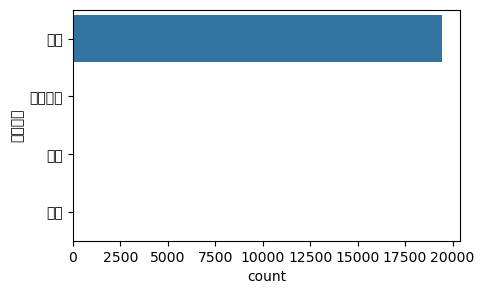

In [23]:
ordered_index = df['영화형태'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = df, y = '영화형태', order=ordered_index)
plt.show()

In [ ]:
len(df['국적'].unique()), df['국적'].unique()

In [24]:
df['국적'].value_counts().sort_values(ascending=False)[:10]

한국     6331
일본     5413
미국     3888
프랑스     644
영국      599
중국      456
독일      304
캐나다     227
홍콩      205
스페인     187
Name: 국적, dtype: int64

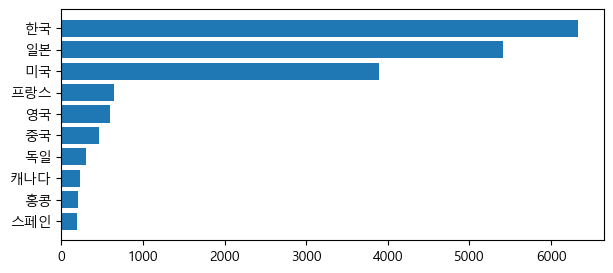

In [25]:
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

top10 = df['국적'].value_counts().sort_values(ascending=True)[-10:].copy()
plt.figure(figsize=(7, 3))
plt.barh(top10.index, top10.values)
plt.show()

In [26]:
len(df['장르'].unique()), df['장르'].unique()

(21,
 array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', 'SF', '범죄', '어드벤처', '전쟁',
        '미스터리', '서부극(웨스턴)', '멜로/로맨스', '스릴러', '다큐멘터리', '공포(호러)', '가족',
        '뮤지컬', '기타', '공연', '성인물(에로)'], dtype=object))

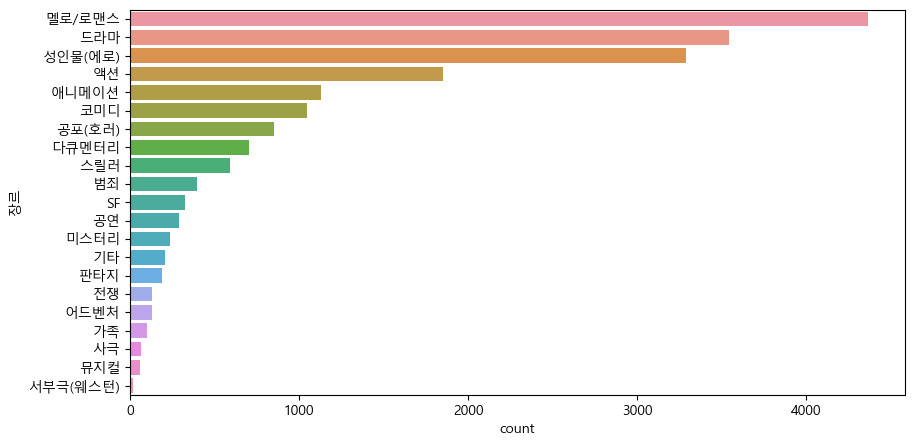

In [27]:
ordered_index = df['장르'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
sns.countplot(data = df, y = '장르', order=ordered_index)
plt.show()

In [36]:
len(df['등급'].unique()), df['등급'].unique()

(4, array(['15세관람가', '12세관람가', '전체관람가', '청소년관람불가'], dtype=object))

In [37]:
df['등급']

순번
1         15세관람가
2         15세관람가
3         12세관람가
4         12세관람가
5         12세관람가
          ...   
19539    청소년관람불가
19540    청소년관람불가
19541    청소년관람불가
19542     15세관람가
19543     15세관람가
Name: 등급, Length: 19517, dtype: object

In [38]:
for idx, row in df.iterrows():
    if ',' in row['등급']:
        ratings = row['등급'].split(',')
        # 전체, 12, 15, 청소년관람불가 순
        if '전체' in ratings:
            df['등급'][idx] = '전체관람가'
        elif '12' in ratings:
            df['등급'][idx] = '12세관람가'
        elif '15' in ratings:
            df['등급'][idx] = '15세관람가'
        else:
            df['등급'][idx] = '청소년관람불가'
    elif df['등급'][idx] == '18세관람가' or df['등급'][idx] == '제한상영가': 
        df['등급'][idx] = '청소년관람불가'
    else:
        df['등급'][idx] = df['등급'][idx].replace('이상', '')

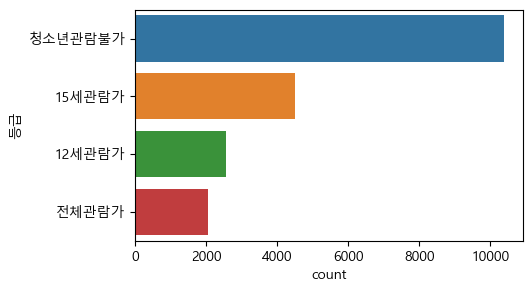

In [39]:
ordered_index = df['등급'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = df, y = '등급', order=ordered_index)
plt.show()

In [40]:
len(df['등급'].unique()), df['등급'].unique()

(4, array(['15세관람가', '12세관람가', '전체관람가', '청소년관람불가'], dtype=object))

In [41]:
len(df['영화구분'].unique()), df['영화구분'].unique()

(2, array(['일반영화', '독립/예술영화'], dtype=object))

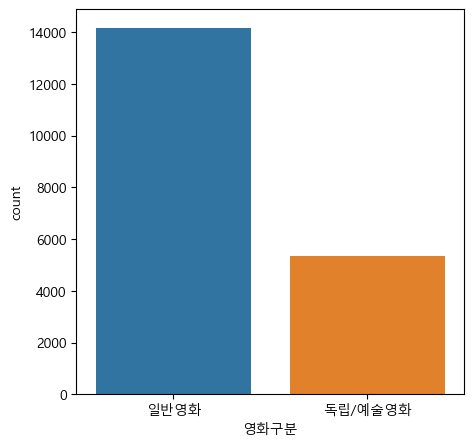

In [42]:
plt.figure(figsize=(5, 5))
sns.countplot(data = df, x = '영화구분')
plt.show()

In [43]:
category_cols = ['영화명','감독', '배급사','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(df[col].unique())))

컬럼 [영화명] UNIQUE : 19161
컬럼 [감독] UNIQUE : 7520
컬럼 [배급사] UNIQUE : 814
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 72
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 4
컬럼 [영화구분] UNIQUE : 2


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19517 entries, 1 to 19543
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     19517 non-null  object
 1   감독      19517 non-null  object
 2   배급사     19517 non-null  object
 3   개봉일     19517 non-null  object
 4   영화형태    19517 non-null  object
 5   국적      19517 non-null  object
 6   전국스크린수  19517 non-null  object
 7   전국 매출액  19517 non-null  object
 8   전국 관객수  19517 non-null  object
 9   장르      19517 non-null  object
 10  등급      19517 non-null  object
 11  영화구분    19517 non-null  object
dtypes: object(12)
memory usage: 2.4+ MB


In [45]:
df.dtypes

영화명       object
감독        object
배급사       object
개봉일       object
영화형태      object
국적        object
전국스크린수    object
전국 매출액    object
전국 관객수    object
장르        object
등급        object
영화구분      object
dtype: object

In [46]:
df['전국 매출액'] = df['전국 매출액'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 매출액'] = df['전국 매출액'].astype('int64')

In [47]:
df['전국스크린수'] = df['전국스크린수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국스크린수'] = df['전국스크린수'].astype('int64')

df['전국 관객수'] = df['전국 관객수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 관객수'] = df['전국 관객수'].astype('int64')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19517 entries, 1 to 19543
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     19517 non-null  object
 1   감독      19517 non-null  object
 2   배급사     19517 non-null  object
 3   개봉일     19517 non-null  object
 4   영화형태    19517 non-null  object
 5   국적      19517 non-null  object
 6   전국스크린수  19517 non-null  int64 
 7   전국 매출액  19517 non-null  int64 
 8   전국 관객수  19517 non-null  int64 
 9   장르      19517 non-null  object
 10  등급      19517 non-null  object
 11  영화구분    19517 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.4+ MB


In [49]:
df[['전국스크린수', '전국 매출액', '전국 관객수']].describe().astype('int64')

,전국스크린수,전국 매출액,전국 관객수
count,19517,19517,19517
mean,80,1038945655,161695
std,223,6052635542,799802
min,0,0,0
25%,1,6000,1
50%,1,270000,132
75%,30,30448757,8249
max,2948,139647979516,17613682


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


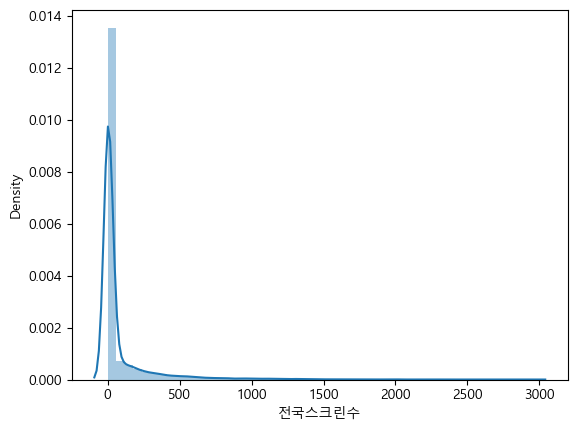

In [50]:
sns.distplot(df['전국스크린수']);

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


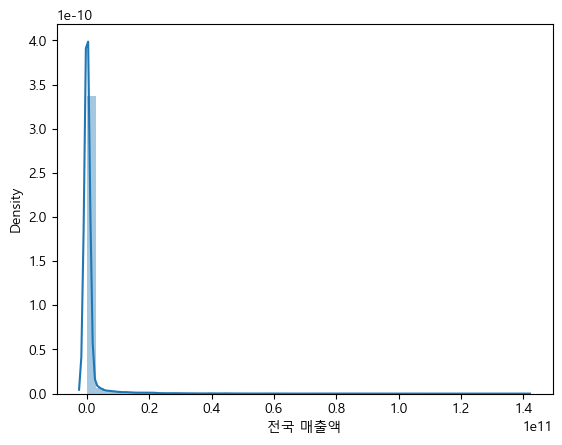

In [51]:
sns.distplot(df['전국 매출액']);

In [52]:
df[(df['전국 관객수'] > 1000) & (df['전국스크린수'] > 50) & (df['전국 관객수'] < 11000000)].count()

영화명       4125
감독        4125
배급사       4125
개봉일       4125
영화형태      4125
국적        4125
전국스크린수    4125
전국 매출액    4125
전국 관객수    4125
장르        4125
등급        4125
영화구분      4125
dtype: int64

In [53]:
movie_resize = df[(df['전국 관객수'] > 1000) & (df['전국스크린수'] > 50) & (df['전국 관객수'] < 11000000)]
movie_resize.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,
24,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니컴퍼니코리아 유한책임회사,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화
25,아바타: 물의 길,제임스 카메론,월트디즈니컴퍼니코리아 유한책임회사,2022-12-14,장편,미국,2809,132262978710,10405342,액션,12세관람가,일반영화
26,기생충,봉준호,(주)씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화
27,겨울왕국,제니퍼 리,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화
28,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아(주),2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화


In [54]:
len(movie_resize['감독'].unique()), movie_resize['감독'].unique()[:10]

(2465,
 array(['조스 웨던', '제임스 카메론', '봉준호', '제니퍼 리', '크리스토퍼 놀란', '브라이언 싱어', '이일형',
        '이상근', '한재림', '쉐인 블랙'], dtype=object))

In [55]:
len(movie_resize['배급사'].unique()), movie_resize['배급사'].unique()[:10]

(247,
 array(['월트디즈니컴퍼니코리아 유한책임회사', '(주)씨제이이엔엠', '소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)',
        '워너브러더스 코리아(주)', '(주)쇼박스', '롯데쇼핑㈜롯데엔터테인먼트', '롯데컬처웍스(주)롯데엔터테인먼트',
        '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점', 'CJ ENM', '이십세기폭스코리아(주)'], dtype=object))

In [56]:
movie_resize['국적'].value_counts().sort_values(ascending=False)[:10]

미국     1522
한국     1261
일본      409
영국      187
프랑스     164
중국      118
독일       57
스페인      46
캐나다      40
홍콩       39
Name: 국적, dtype: int64

In [57]:
movie_resize[movie_resize['국적'] == '미국'].describe().astype('int64')

,전국스크린수,전국 매출액,전국 관객수
count,1522,1522,1522
mean,413,5411997219,666979
std,399,11320411250,1328688
min,51,8596000,1047
25%,154,236609910,30227
50%,280,1042534450,135143
75%,532,4658796857,606763
max,2948,132262978710,10494499


In [ ]:
movie_resize[movie_resize['국적'] == '한국'].describe().astype('int64')

In [ ]:
movie_resize[movie_resize['국적'] == '일본'].describe().astype('int64')

In [ ]:
movie_resize[movie_resize['국적'] == '영국'].describe().astype('int64')

In [ ]:
movie_resize[movie_resize['국적'] == '프랑스'].describe().astype('int64')

In [ ]:
movie_resize[movie_resize['국적'] == '중국'].describe().astype('int64')

In [ ]:
movie_resize[movie_resize['국적'] == '독일'].describe().astype('int64')

In [ ]:
movie_resize[movie_resize['국적'] == '스페인'].describe().astype('int64')

In [58]:
# 국적 데이터 변경
for idx, row in movie_resize.iterrows():
    if  row['국적'] not in ['미국', '한국', '일본', '영국', '프랑스','중국','독일']:
        movie_resize['국적'][idx] = '기타'

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13944\1179239548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize['국적'][idx] = '기타'


In [59]:
movie_resize['국적'].value_counts()

미국     1522
한국     1261
일본      409
기타      407
영국      187
프랑스     164
중국      118
독일       57
Name: 국적, dtype: int64

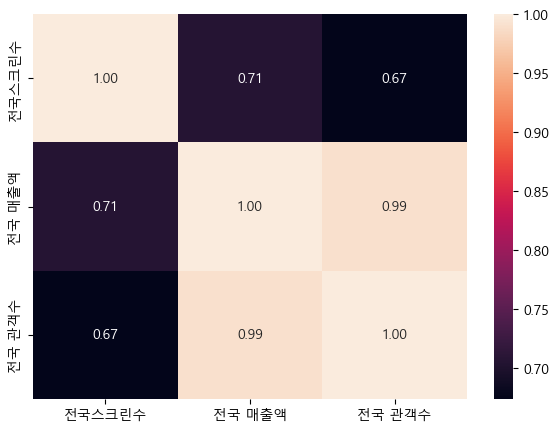

In [60]:
plt.figure(figsize=(7, 5))
sns.heatmap(data=movie_resize[['전국스크린수', '전국 매출액', '전국 관객수']].corr(), fmt='.2f', annot=True)
plt.show()

In [61]:
movie_resize.describe().astype('int64')

,전국스크린수,전국 매출액,전국 관객수
count,4125,4125,4125
mean,352,4361727792,550679
std,356,10123757929,1242448
min,51,0,1005
25%,117,119414000,15386
50%,228,521471618,68711
75%,457,3292020500,425571
max,2948,132262978710,10494499


In [62]:
movie_resize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4125 entries, 24 to 7676
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     4125 non-null   object
 1   감독      4125 non-null   object
 2   배급사     4125 non-null   object
 3   개봉일     4125 non-null   object
 4   영화형태    4125 non-null   object
 5   국적      4125 non-null   object
 6   전국스크린수  4125 non-null   int64 
 7   전국 매출액  4125 non-null   int64 
 8   전국 관객수  4125 non-null   int64 
 9   장르      4125 non-null   object
 10  등급      4125 non-null   object
 11  영화구분    4125 non-null   object
dtypes: int64(3), object(9)
memory usage: 548.0+ KB


In [63]:
movie_resize.describe().astype('int64')

,전국스크린수,전국 매출액,전국 관객수
count,4125,4125,4125
mean,352,4361727792,550679
std,356,10123757929,1242448
min,51,0,1005
25%,117,119414000,15386
50%,228,521471618,68711
75%,457,3292020500,425571
max,2948,132262978710,10494499


In [64]:
movie_resize['흥행_여부'] = [0 for _ in range(len(movie_resize))]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13944\2841986532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize['흥행_여부'] = [0 for _ in range(len(movie_resize))]


In [65]:
movie_resize.loc[movie_resize[(movie_resize['전국 관객수'] > 550679)].index,'흥행_여부'] = 1

In [66]:
movie_resize

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,흥행_여부
순번,,,,,,,,,,,,,
24,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니컴퍼니코리아 유한책임회사,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,1
25,아바타: 물의 길,제임스 카메론,월트디즈니컴퍼니코리아 유한책임회사,2022-12-14,장편,미국,2809,132262978710,10405342,액션,12세관람가,일반영화,1
26,기생충,봉준호,(주)씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,1
27,겨울왕국,제니퍼 리,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,1
28,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아(주),2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7513,앙상블,정형석,(주)스톰픽쳐스코리아,2020-11-05,장편,한국,52,10376610,1140,드라마,12세관람가,독립/예술영화,0
7531,퍼펙트 스틸,기타,(주)팝엔터테인먼트,2021-10-28,장편,영국,66,10073100,1122,범죄,15세관람가,일반영화,0
7558,신 테니스의 왕자 효테이 vs 릿카이 : 게임 오브 퓨처 전편,카와구치 케이이치로,(주)얼리버드픽쳐스,2021-03-24,장편,일본,60,8850500,1102,애니메이션,전체관람가,일반영화,0


In [71]:
movie_labels = pd.get_dummies(movie_resize,columns = ['영화형태','국적','장르','등급','영화구분'])

In [72]:
movie_labels.head()

,영화명,감독,배급사,개봉일,전국스크린수,전국 매출액,전국 관객수,흥행_여부,영화형태_단편,영화형태_옴니버스,영화형태_장편,국적_기타,국적_독일,국적_미국,국적_영국,국적_일본,국적_중국,국적_프랑스,국적_한국,장르_SF,장르_가족,장르_공연,장르_공포(호러),장르_기타,장르_다큐멘터리,장르_드라마,장르_멜로/로맨스,장르_뮤지컬,장르_미스터리,장르_범죄,장르_사극,장르_서부극(웨스턴),장르_성인물(에로),장르_스릴러,장르_애니메이션,장르_액션,장르_어드벤처,장르_전쟁,장르_코미디,장르_판타지,등급_12세관람가,등급_15세관람가,등급_전체관람가,등급_청소년관람불가,영화구분_독립/예술영화,영화구분_일반영화
순번,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니컴퍼니코리아 유한책임회사,2015-04-23,1843,88582586366,10494499,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
25,아바타: 물의 길,제임스 카메론,월트디즈니컴퍼니코리아 유한책임회사,2022-12-14,2809,132262978710,10405342,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
26,기생충,봉준호,(주)씨제이이엔엠,2019-05-30,1948,87459829095,10313086,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
27,겨울왕국,제니퍼 리,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),2014-01-16,1010,82461504400,10296101,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
28,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아(주),2014-11-06,1342,82274331200,10273803,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [73]:
not_used = ['영화명', '감독', '배급사','개봉일', '전국 관객수']

movie_DL = movie_labels.drop(not_used, axis=1)

In [74]:
movie_DL.columns

Index(['전국스크린수', '전국 매출액', '흥행_여부', '영화형태_단편', '영화형태_옴니버스', '영화형태_장편', '국적_기타',
       '국적_독일', '국적_미국', '국적_영국', '국적_일본', '국적_중국', '국적_프랑스', '국적_한국', '장르_SF',
       '장르_가족', '장르_공연', '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마',
       '장르_멜로/로맨스', '장르_뮤지컬', '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)',
       '장르_성인물(에로)', '장르_스릴러', '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁',
       '장르_코미디', '장르_판타지', '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가',
       '영화구분_독립/예술영화', '영화구분_일반영화'],
      dtype='object')

In [75]:
독립 = movie_DL[['전국스크린수', '전국 매출액','영화형태_단편', '영화형태_옴니버스', '영화형태_장편', '국적_기타',
       '국적_독일', '국적_미국', '국적_영국', '국적_일본', '국적_중국', '국적_프랑스', '국적_한국', '장르_SF',
       '장르_가족', '장르_공연', '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마',
       '장르_멜로/로맨스', '장르_뮤지컬', '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)',
       '장르_성인물(에로)', '장르_스릴러', '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁',
       '장르_코미디', '장르_판타지', '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가',
       '영화구분_독립/예술영화', '영화구분_일반영화']] 
종속 = movie_DL[['흥행_여부']]

In [82]:
독립.shape

(4125, 40)

In [84]:
X = tf.keras.layers.Input(shape=[40])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse')

In [86]:
model.fit(독립,종속,epochs=1000)

Epoch 1/1000
129/129 [==============================] - 0s 2ms/step - loss: 4609895463741554688.0000
Epoch 2/1000
129/129 [==============================] - 0s 2ms/step - loss: 4609894913985740800.0000
Epoch 3/1000
129/129 [==============================] - 0s 2ms/step - loss: 4609894913985740800.0000
Epoch 4/1000
129/129 [==============================] - 0s 1ms/step - loss: 4609895463741554688.0000
Epoch 5/1000
129/129 [==============================] - 0s 2ms/step - loss: 4609894364229926912.0000
Epoch 6/1000
129/129 [==============================] - 0s 2ms/step - loss: 4609896563253182464.0000
Epoch 7/1000
129/129 [==============================] - 0s 2ms/step - loss: 4609894364229926912.0000
Epoch 8/1000
129/129 [==============================] - 0s 2ms/step - loss: 4609893814474113024.0000
Epoch 9/1000
129/129 [==============================] - 0s 1ms/step - loss: 4609892165206671360.0000
Epoch 10/1000
129/129 [==============================] - 0s 2ms/step - loss: 46098938144741